In [1]:
import pandas as pd
import numpy as np


In [7]:
import os
def list_files(startpath):
    dircount = 0
    filecount = 0
    for root, dirs, files in os.walk(startpath):
        dircount += len(dirs)
        filecount += len(files)
    print("{} files in {} folders".format(filecount, dircount))


In [8]:
list_files('./collated_defect')

660 files in 39 folders


In [9]:
list_files('./collated_non_defect')

1170 files in 32 folders


In [11]:
from pathlib import Path
from PIL import Image

arr_of_diagonals_defect= []
arr_of_diagonals_non_defect= []

pathlist = Path('./collated_defect').rglob('*.tif')
for path in pathlist:
     path_in_str = str(path)
     im = Image.open('./' + path_in_str.replace('\\', "/"))
     width, height = im.size
     arr_of_diagonals_defect += [np.sqrt(width**2 + height**2)]

pathlist = Path('./collated_non_defect').rglob('*.tif')
for path in pathlist:
     path_in_str = str(path)
     im = Image.open('./' + path_in_str.replace('\\', "/"))
     width, height = im.size
     arr_of_diagonals_non_defect += [np.sqrt(width**2 + height**2)]

print(len(arr_of_diagonals_defect))
print(len(arr_of_diagonals_non_defect))



659
1170


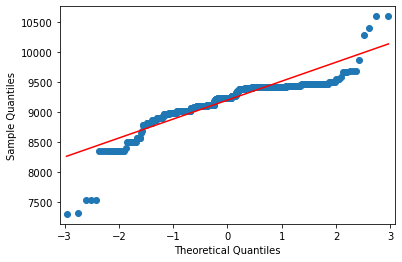

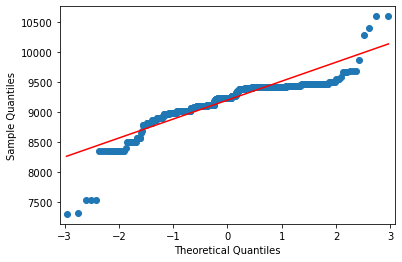

In [12]:
from statsmodels.graphics.gofplots import qqplot
qqplot(np.asarray(arr_of_diagonals_defect), line='s')


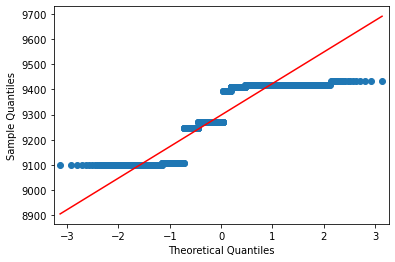

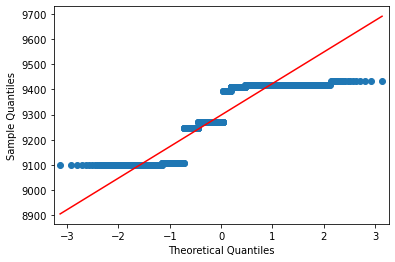

In [13]:
from statsmodels.graphics.gofplots import qqplot
qqplot(np.asarray(arr_of_diagonals_non_defect), line='s')

QQ plot showing the scatter plot of points in a diagonal line, closely fitting the expected diagonal pattern for a sample from a Gaussian distribution.

In [14]:
from scipy.stats import shapiro
def Shapiro(arr):
	stat, p = shapiro(np.asarray(arr))
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')

In [16]:
Shapiro(arr_of_diagonals_defect)
Shapiro(arr_of_diagonals_non_defect)

Statistics=0.824, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.792, p=0.000
Sample does not look Gaussian (reject H0)


In [17]:

# D'Agostino and Pearson's Test
from scipy.stats import normaltest
def ago_pear(arr): 
	# normality test
	stat, p = normaltest(arr)
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')

In [18]:
ago_pear(arr_of_diagonals_defect)
ago_pear(arr_of_diagonals_non_defect)

Statistics=257.658, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=2131.794, p=0.000
Sample does not look Gaussian (reject H0)


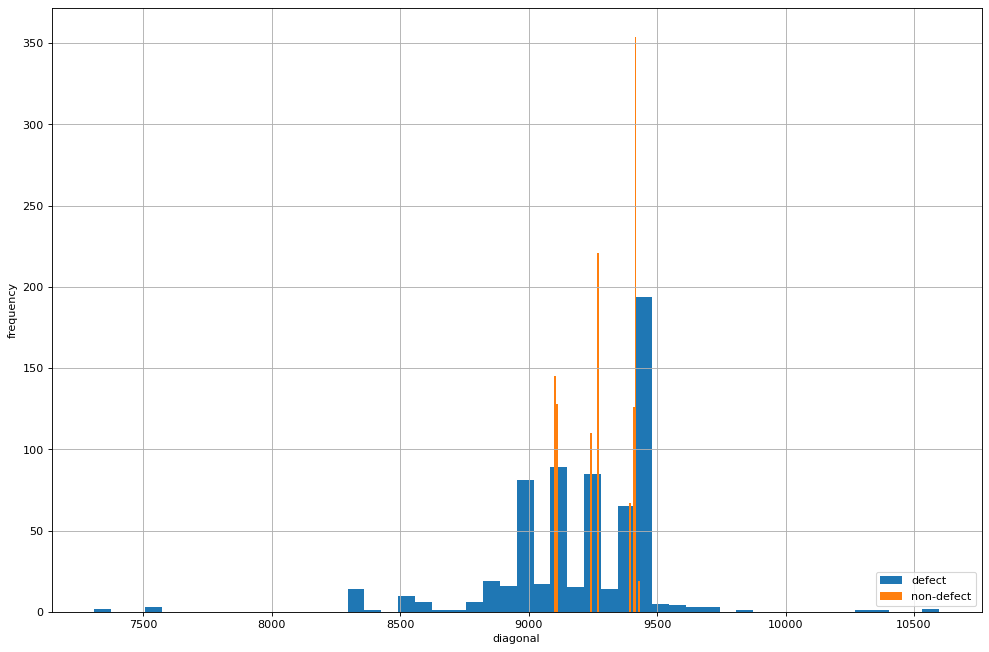

In [25]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)
axes = plt.axes()
axes.grid()
plt.hist(arr_of_diagonals_defect, 50)
plt.hist(arr_of_diagonals_non_defect, 50)
plt.xlabel('diagonal')
plt.ylabel('frequency')
plt.legend(['defect', 'non-defect'], loc=4)

In statistics, the Kolmogorov–Smirnov test (K–S test or KS test) is a nonparametric test of the equality of continuous (or discontinuous, see Section 2.2), one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample K–S test), or to compare two samples (two-sample K–S test). In essence, the test answers the question "What is the probability that this collection of samples could have been drawn from that probability distribution?" or, in the second case, "What is the probability that these two sets of samples were drawn from the same (but unknown) probability distribution?".

can compare the p-value to a level of significance a, usually a=0.05 or 0.01 (you decide, the lower a is, the more significant). If p-value is lower than a, then it is very probable that the two distributions are different.

In [26]:
from scipy.stats import ks_2samp
print(ks_2samp(arr_of_diagonals_defect, arr_of_diagonals_non_defect))


KstestResult(statistic=0.2852807283763278, pvalue=6.873745525278949e-31)


Conclusion - The distributions are different.

In [27]:
import scipy.stats as sp
print("Defect data has a skew of {} and a kurtosis of {}".format(sp.skew(arr_of_diagonals_defect), sp.kurtosis(arr_of_diagonals_defect)))


Defect data has a skew of -1.5269299641982486 and a kurtosis of 8.146140804414168


In [28]:
import scipy.stats as sp
print("Non-defect data has a skew of {} and a kurtosis of {}".format(sp.skew(arr_of_diagonals_non_defect), sp.kurtosis(arr_of_diagonals_non_defect)))


Non-defect data has a skew of -0.5002621019641827 and a kurtosis of -1.2831850416441455


## Conclusion:
- Dimentions are not normally distributed 
- dimentions from defect and non defect different parent distribution 
- dimentions of subsets used in Imagenet are from differnt distributions. 


In [29]:
arr_of_heights_defect= []
arr_of_widths_defect= []

arr_of_heights_non_defect= []
arr_of_widths_non_defect= []

pathlist = Path('./collated_defect/').rglob('*.tif')
for path in pathlist:
     path_in_str = str(path)
     im = Image.open('./' + path_in_str.replace('\\', "/"))
     width, height = im.size
     arr_of_heights_defect += [height]
     arr_of_widths_defect += [width]

pathlist = Path('./collated_non_defect/').rglob('*.tif')
for path in pathlist:
     path_in_str = str(path)
     im = Image.open('./' + path_in_str.replace('\\', "/"))
     width, height = im.size
     arr_of_heights_non_defect += [height]
     arr_of_widths_non_defect += [width]

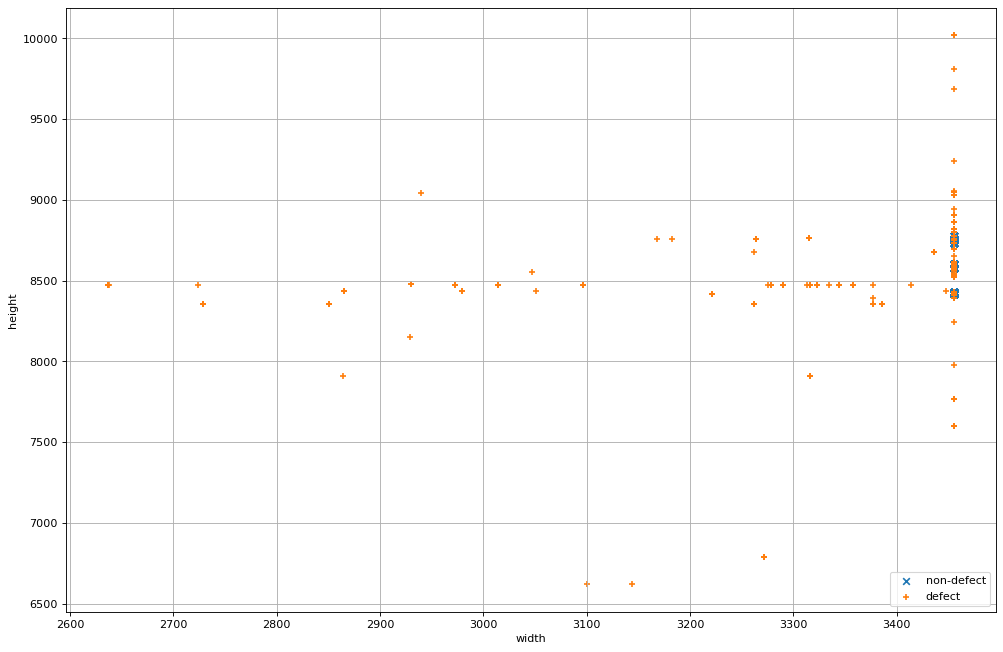

In [30]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)
axes = plt.axes()
axes.grid()
plt.xlabel('width')
plt.ylabel('height')
plt.scatter(arr_of_widths_non_defect, arr_of_heights_non_defect, marker="x")
plt.scatter(arr_of_widths_defect, arr_of_heights_defect, marker="+")
plt.legend(['non-defect', 'defect'], loc=4)

plt.show()

Conclusion:

- Defect images tend to have a much smaller width 
- This explains why IMagenet was able to easily classify, as these were streched more horizontally
- Height seems pretty normally distributed 


 Qns:

 - Why do non-defects have a much smaller vaiation in width 
 - Why is the width of 3460 have more defect images with a larger height? Explain Distribution seen here pls 


decide to crop to 3450x8250